In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('Algerian_forest_fires_dataset_cleaned.csv')#this is use to read csv file

In [4]:
df.head()#print top most atlest 5 data of the dataframe

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df.columns #use to print columns name


Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0', 'day', 'month', 'year'],axis=1,inplace=True)#drop the not usefull element

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [9]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)# conver cat data into computer related form encoding

In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.207623
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.398565
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.205073
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.024564
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.174134
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.141206
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.126965
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.208794
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.037932
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.141164


In [12]:
#dependent and independnt elements
x=df.drop('FWI',axis=1)
y=df['FWI']

In [13]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [15]:
x_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


In [16]:
## feature selection based on correlation
x_train.corr()


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.193308
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.371459
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.227261
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.031947
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.182311
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.162889
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.109009
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.243320
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.064191
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.138309


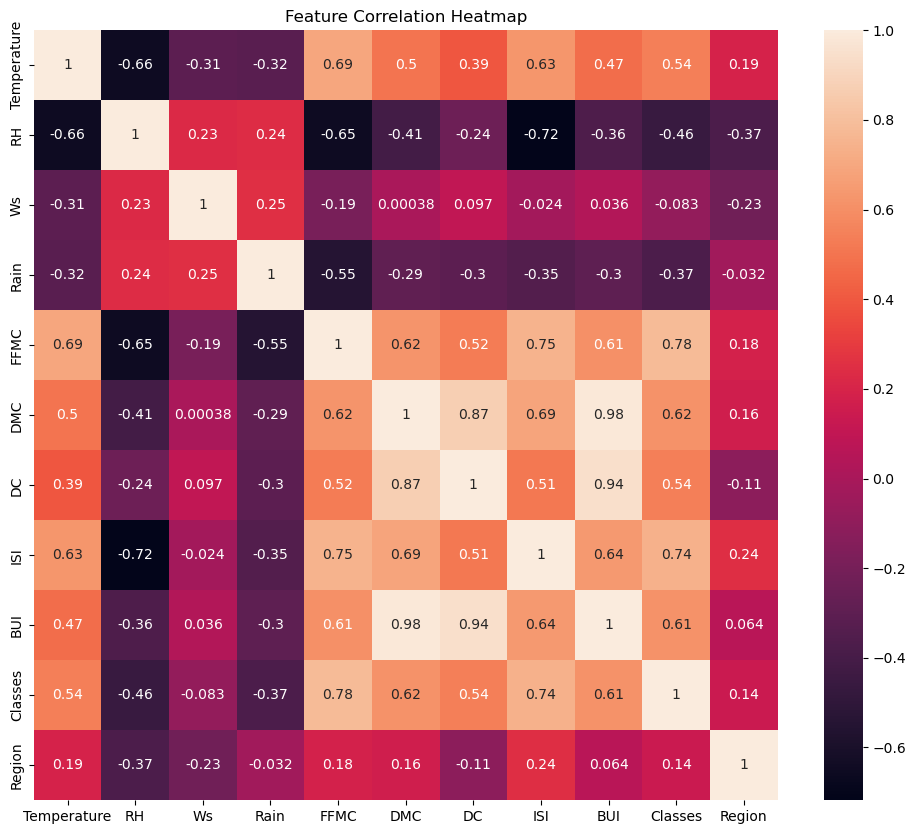

In [17]:
# search for multicorrelation
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot=True)
plt.title("Feature Correlation Heatmap")
plt.show();


In [18]:
def correlation(dataset,threshold):
    col_corr =set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
    

In [19]:
corr_features = correlation(x_train,0.85)

## Drop feature when Correlation is More Than 0.85

In [20]:
x_train.drop(corr_features,axis=1,inplace=True)

In [21]:
x_test.drop(corr_features,axis=1,inplace=True)

In [22]:
#feature scaling and standardization 
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [23]:
x_train_scaler = Scaler.fit_transform(x_train)
x_test_scaler = Scaler.transform(x_test)

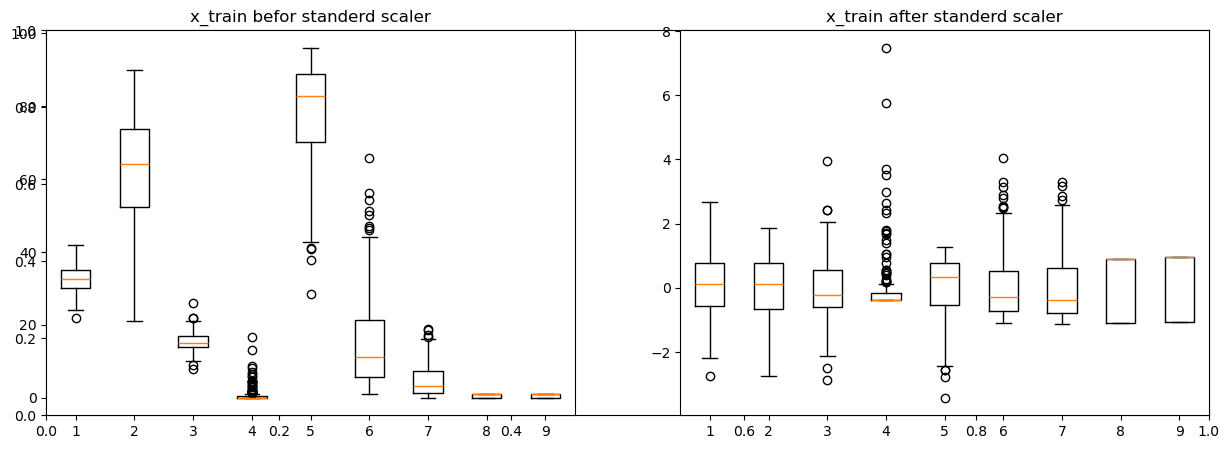

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(x_train)
plt.title('x_train befor standerd scaler')
plt.subplot(1,2,2)
plt.boxplot(x_train_scaler)
plt.title('x_train after standerd scaler')
plt.show();


## Linear regression

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
line= LinearRegression()
line.fit(x_train_scaler,y_train)
y_pred = line.predict(x_test_scaler)

Mean absolute error 0.5511732477203063
r2_score 0.9844234335613641 


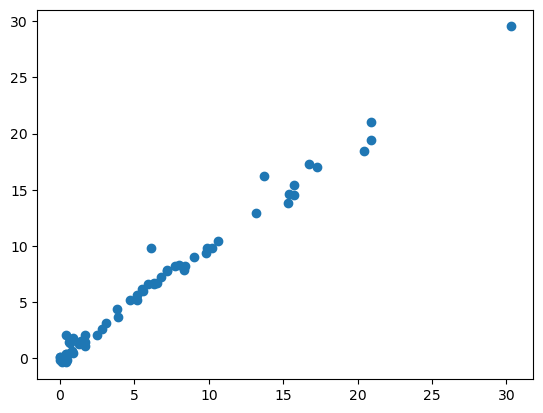

In [26]:
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f'Mean absolute error {mae}')
print(f'r2_score {score} ')
plt.scatter(y_test,y_pred)
plt.show()

## Lasso Regression

Mean absolute error 1.1331759949144085
r2_score 0.9492020263112388 


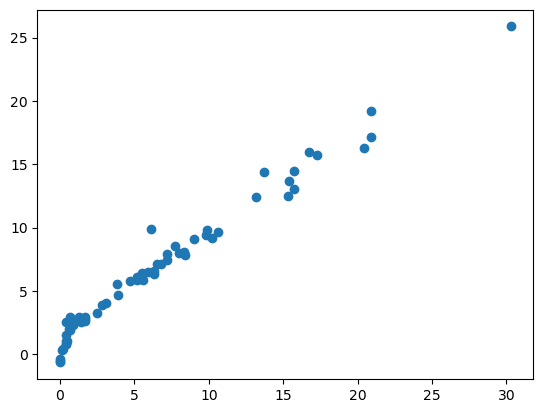

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso= Lasso()
lasso.fit(x_train_scaler,y_train)
y_pred = lasso.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f'Mean absolute error {mae}')
print(f'r2_score {score} ')
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 0.6026429951018907
r2_score 0.9822533242835354 


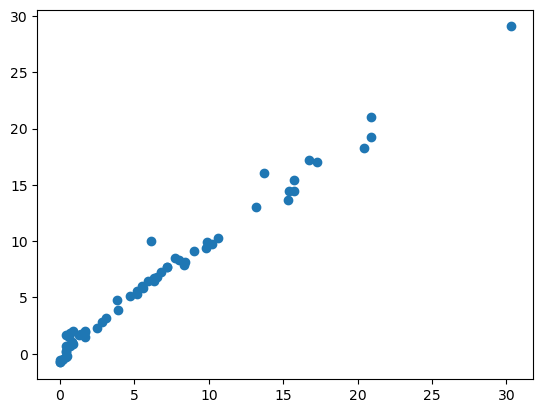

In [28]:
## CrossVelidation
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv= LassoCV(cv=5)
lassocv.fit(x_train_scaler,y_train)
y_pred = lassocv.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f'Mean absolute error {mae}')
print(f'r2_score {score} ')
plt.scatter(y_test,y_pred)
plt.show()

Mean absolute error 0.5603960389510871
r2_score 0.9840471449064704 


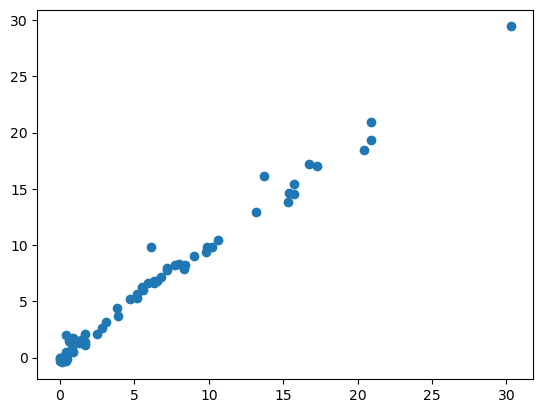

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(x_train_scaler,y_train)
y_pred = ridge.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f'Mean absolute error {mae}')
print(f'r2_score {score} ')
plt.scatter(y_test,y_pred)
plt.show()

## Ridge Regression Cross Velidation

Mean absolute error 0.5603960389510871
r2_score 0.9840471449064704 


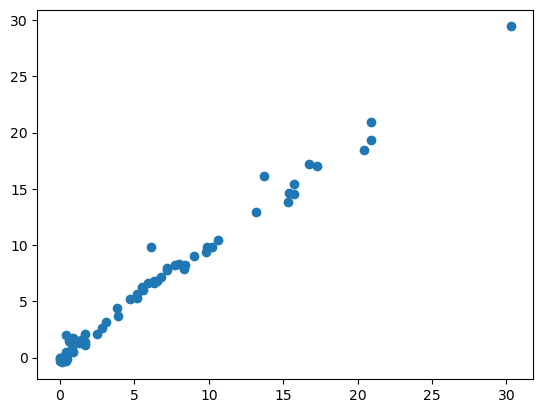

In [30]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaler,y_train)
y_pred = ridgecv.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f'Mean absolute error {mae}')
print(f'r2_score {score} ')
plt.scatter(y_test,y_pred)
plt.show()

### Elasticnet Regression

Mean absolute error 1.8822353634896
r2_score 0.8753460589519703 


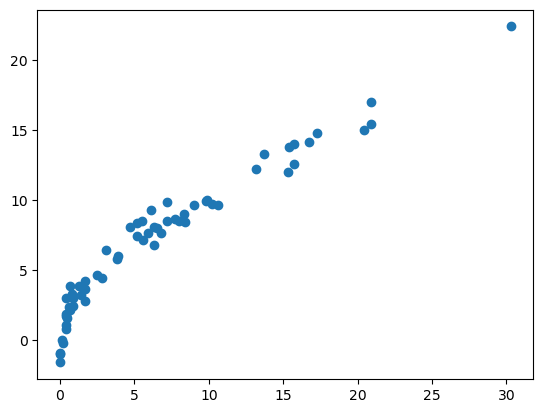

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Elast = ElasticNet()
Elast.fit(x_train_scaler,y_train)
y_pred = Elast.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f'Mean absolute error {mae}')
print(f'r2_score {score} ')
plt.scatter(y_test,y_pred)
plt.show()

## ElasticNet crossvelidation

Mean absolute error 0.6409409986152594
r2_score 0.9815043779354953 


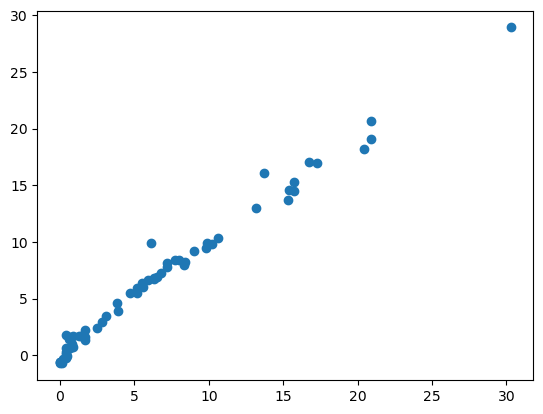

In [32]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Elastcv = ElasticNetCV(cv=5)
Elastcv.fit(x_train_scaler,y_train)
y_pred = Elastcv.predict(x_test_scaler)
mae=mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print(f'Mean absolute error {mae}')
print(f'r2_score {score} ')
plt.scatter(y_test,y_pred)
plt.show()

## Pickel ML model ,preprocessing,model selcetion

In [33]:
Scaler

StandardScaler()

In [34]:
ridge

Ridge()

In [35]:
import pickle
pickle.dump(Scaler,open('Scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))